In [ ]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

In [ ]:
# 1. Load IMDb dataset
max_features = 1000  # Top 10,000 most frequent words
maxlen = 200          # Maximum number of words in a review
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [ ]:
# Pad sequences to ensure uniform input size
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
# 2. Build the LSTM Model
model = Sequential([
    Embedding(input_dim=max_features, output_dim=128, input_length=maxlen),
    SpatialDropout1D(0.2),
    LSTM(100, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 3. Train the Model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test), verbose=2)

Epoch 1/5
391/391 - 170s - 434ms/step - accuracy: 0.7214 - loss: 0.5486 - val_accuracy: 0.8013 - val_loss: 0.4354
Epoch 2/5
391/391 - 198s - 505ms/step - accuracy: 0.7614 - loss: 0.4965 - val_accuracy: 0.7760 - val_loss: 0.4821
Epoch 3/5
391/391 - 201s - 515ms/step - accuracy: 0.7790 - loss: 0.4688 - val_accuracy: 0.7908 - val_loss: 0.4377
Epoch 4/5
391/391 - 203s - 518ms/step - accuracy: 0.8129 - loss: 0.4127 - val_accuracy: 0.8292 - val_loss: 0.3823
Epoch 5/5
391/391 - 162s - 414ms/step - accuracy: 0.8306 - loss: 0.3846 - val_accuracy: 0.8382 - val_loss: 0.3616


In [ ]:
# 4. Evaluate the Model
score, accuracy = model.evaluate(x_test, y_test, batch_size=64)
print(f"Test Score: {score}")
print(f"Test Accuracy: {accuracy}")

391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 85ms/step - accuracy: 0.8370 - loss: 0.3621
Test Score: 0.36161133646965027
Test Accuracy: 0.8382400274276733


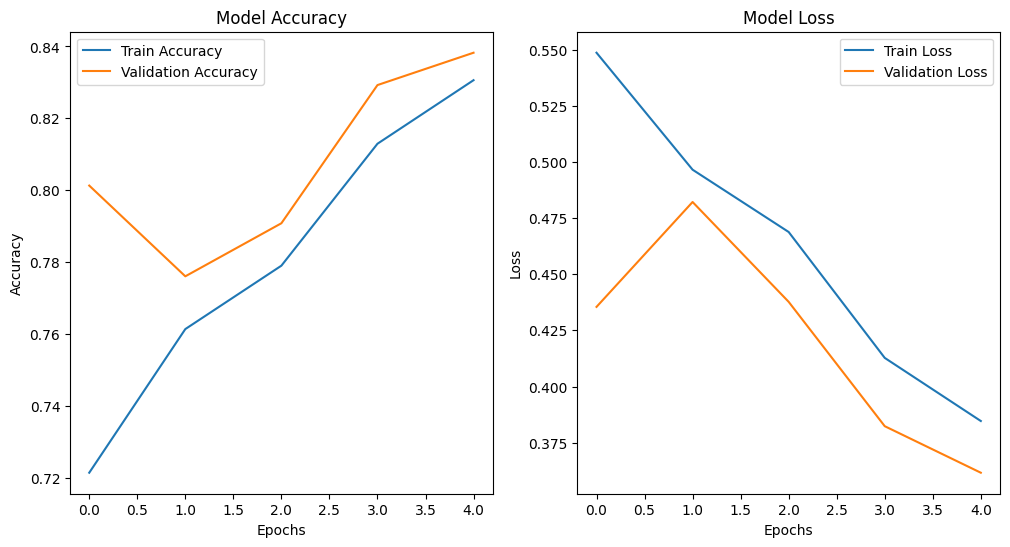

In [ ]:
# 5. Plot Accuracy and Loss
plt.figure(figsize=(12, 6))
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# 6. Predict on New Reviews
def predict_sentiment(review):
    word_index = imdb.get_word_index()
    tokens = [word_index.get(word, 0) for word in review.lower().split()]
    tokens_padded = pad_sequences([tokens], maxlen=maxlen)
    prediction = model.predict(tokens_padded)
    return "Positive" if prediction >= 0.5 else "Negative"

In [ ]:
# Test with a sample review
sample_review = "This movie was amazing."
print(f"Review: {sample_review}\nPrediction: {predict_sentiment(sample_review)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Review: this movie was amazing
Prediction: Positive
